# K Nearest Neighbours in Code

In [5]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter

style.use('fivethirtyeight')

<function matplotlib.pyplot.show(close=None, block=None)>

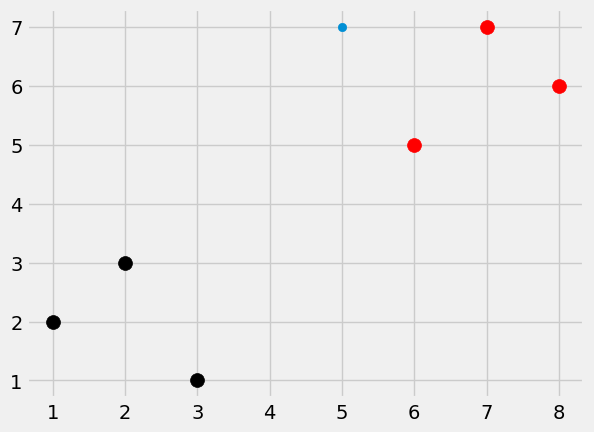

In [6]:
dataset = {'k':[ [ 1,2],[2,3],[3,1]],   'r': [[6,5],[7,7],[8,6]]}
new_features = [5,7]

# [[plt.scatter(ii[0] , ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
# plt.scatter(new_features[0], new_features[1])
# plt.show

None


<function matplotlib.pyplot.show(close=None, block=None)>

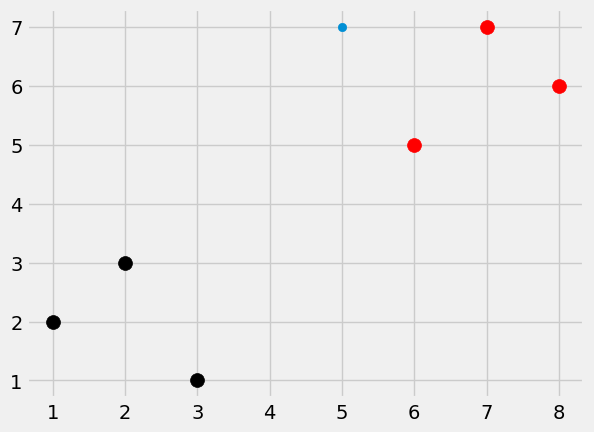

In [25]:
dataset = {'k':[ [ 1,2],[2,3],[3,1]],   'r': [[6,5],[7,7],[8,6]]}
new_features = [5,7]

def k_nearest_nighbours(data,predict,k=3):
    if len(data)>=k:
        warnings.warn('K is set to a value less than total voting groups')
        distances= []
        for group in data:
            for features in data[group]:
                euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
                distances.append([euclidean_distance, group])

        votes = [i[1] for i in sorted(distances)[:k]]
        print(Counter(votes).most_common(1))
        vote_result = Counter(votes).most_common(1)[0][0]
        return vote_result

result = k_nearest_nighbours(dataset,new_features,k=3)
print(result)

[[plt.scatter(ii[0] , ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], color = result)
plt.show

**applying KNN ( breast cancer dataset)**

In [118]:
import pandas as pd
import numpy as np
import random
import warnings
from collections import Counter
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler

def k_nearest_neighbours(data, predict, k=3):
    if len(data) >= k:
        distances = []
        for group in data:
            for features in data[group]:
                euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
                distances.append([euclidean_distance, group])
        
        distances.sort(key=lambda x: x[0])  # Sort by distance
        votes = [i[1] for i in distances[:k]]
        vote_result = Counter(votes).most_common(1)[0][0]
        return vote_result
    else:
        warnings.warn('K is set to a value less than total voting groups')

# Fetch the dataset
breast_cancer_wisconsin = fetch_ucirepo(id=15)
df = pd.DataFrame(data=breast_cancer_wisconsin.data.features, columns=breast_cancer_wisconsin.feature_names)
df['target'] = breast_cancer_wisconsin.data.targets

# Normalize features
scaler = StandardScaler()
features = df.drop('target', axis=1)
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['target'] = df['target']

# Replace missing values if any
df_scaled.replace('?', -99999, inplace=True)

full_data = df_scaled.values.tolist()
random.shuffle(full_data)

# Split data
test_size = 0.2
split_index = int(len(full_data) * (1 - test_size))
train_data = full_data[:split_index]
test_data = full_data[split_index:]

# Create train and test sets
train_set = {2: [], 4: []}
test_set = {2: [], 4: []}

for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

# Determine unique labels and choose appropriate k
unique_labels = set(train_set.keys())
k = min(len(unique_labels), 3)  # Choose k based on unique labels

# Evaluate the model
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbours(train_set, data, k=k)
        if group == vote:
            correct += 1
        total += 1

print('Accuracy:', correct / total)


Accuracy: 0.5857142857142857
